# Credit Card Fraud

We will be detecting credit card fraud based on the different features of our dataset with 3 different models. Here is the Logistic Regression one.

We're looking to minimize the False Negative Rate or FNR.

Since the dataset is unbalanced, we can try two techniques that may help us have better predictions:

    - Adding some noise (gaussian) to the fraud data to create more and reduce the imbalance
    - Randomly sample the fraud data and train k models and average them out (or choose the best)
    
 

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix
import pandas_ml as pdml
from sklearn.preprocessing import scale
import random

/Users/karthikanand/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [6]:
# May have to do this...
#!pip install imblearn
#!pip install --upgrade sklearn
%matplotlib inline

In [7]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,162688.0,2.029012,0.172635,-1.713242,0.536619,0.174828,-1.438235,0.271940,-0.371993,0.591460,...,0.207313,0.758169,-0.022307,-0.076973,0.233854,-0.099335,-0.001211,-0.029970,13.49,0
1,51268.0,-0.539429,0.281131,1.410987,-2.018694,0.263857,-0.890316,0.932979,-0.343308,-1.526425,...,0.207052,0.574397,-0.449829,0.088753,0.712234,-0.204066,-0.175816,-0.188002,15.00,0
2,122407.0,-1.328733,1.039159,-1.968735,-0.355384,-0.335289,1.818371,1.201645,-1.218494,-0.209533,...,1.770539,0.927960,0.385005,-1.491069,-0.451834,-0.025789,0.231979,-0.146438,333.20,0
3,84341.0,-1.154759,0.639114,1.038852,-1.146102,2.004695,4.131545,-0.301740,0.927599,0.644301,...,-0.204654,-0.296894,-0.290252,1.031124,0.397492,0.335932,-0.012364,-0.029790,10.49,0
4,22509.0,1.294186,0.939724,-0.060676,2.480072,0.799090,-0.291020,0.541627,-0.382965,0.094943,...,-0.206610,-0.298167,-0.210986,-0.482992,0.862044,0.078045,-0.058997,-0.002331,2.05,0


In [8]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


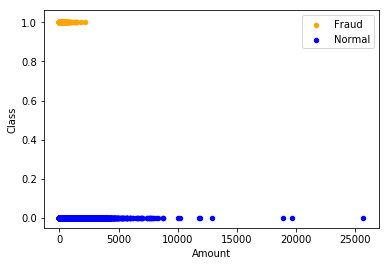

This feature looks important based on their distribution with respect to class.
We will now zoom in onto the fraud data to see the ranges of amount just for fun.


In [9]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")
print("We will now zoom in onto the fraud data to see the ranges of amount just for fun.")

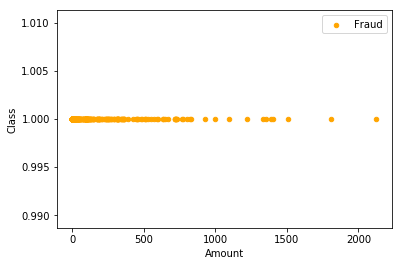

In [10]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

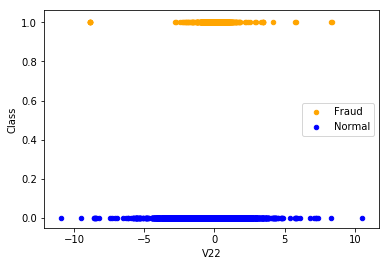

This feature may not be very important because of the similar distribution.


In [11]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature may not be very important because of the similar distribution.")

# Logistic Regression (vanilla)

In [12]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [13]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 187 0.001875946751201308
Number of frauds on y_train: 305 0.001647544348652795


In [14]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

/Users/karthikanand/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.9987660885005467


In [15]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      99451    45    99496
True          78   109      187
__all__    99529   154    99683


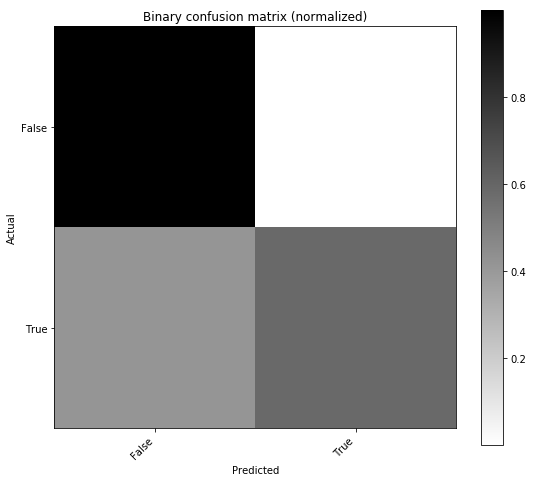

population: 99683
P: 187
N: 99496
PositiveTest: 154
NegativeTest: 99529
TP: 109
TN: 99451
FP: 45
FN: 78
TPR: 0.5828877005347594
TNR: 0.9995477205113773
PPV: 0.7077922077922078
NPV: 0.9992163088145164
FPR: 0.0004522794886226582
FDR: 0.2922077922077922
FNR: 0.41711229946524064
ACC: 0.9987660885005467
F1_score: 0.6392961876832844
MCC: 0.6417061656654407
informedness: 0.5824354210461367
markedness: 0.7070085166067241
prevalence: 0.001875946751201308
LRP: 1288.7776589423647
LRN: 0.41730103616447883
DOR: 3088.364387464387
FOR: 0.0007836911854836279


In [16]:
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

In [17]:
print("FNR is {0}".format(confusion_matrix.stats()['FNR']))

FNR is 0.41711229946524064


# Logistic Regression with SMOTE over-sampling

In [18]:
df2 = pdml.ModelFrame(X_train, target=y_train)
sampler = df2.imbalance.over_sampling.SMOTE()
sampled = df2.fit_sample(sampler)
print("Size of training set after over sampling:", len(sampled))

Size of training set after over sampling: 369638


In [19]:
X_train_sampled = sampled.iloc[:,1:]
y_train_sampled = sampled['Class']

# NOTE: Scaling makes it worse.
# X_train_sampled = scale(X_train_sampled)

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train_sampled, y_train_sampled)
print("Score: ", logistic.score(X_test, y_test))

/Users/karthikanand/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.9848820761814954


Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      98011  1485    99496
True          22   165      187
__all__    98033  1650    99683


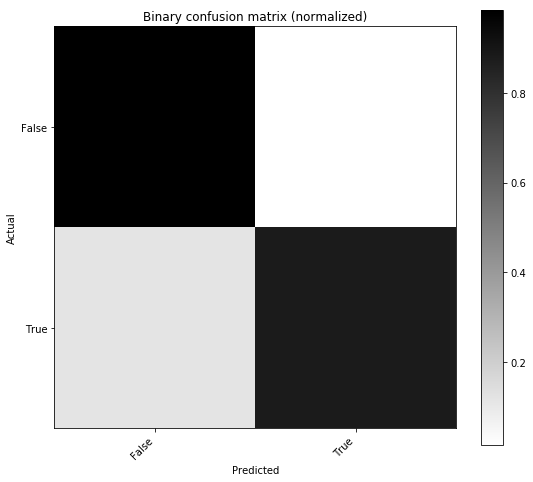

population: 99683
P: 187
N: 99496
PositiveTest: 1650
NegativeTest: 98033
TP: 165
TN: 98011
FP: 1485
FN: 22
TPR: 0.8823529411764706
TNR: 0.9850747768754523
PPV: 0.1
NPV: 0.999775585772138
FPR: 0.01492522312454772
FDR: 0.9
FNR: 0.11764705882352941
ACC: 0.9848820761814954
F1_score: 0.17964071856287425
MCC: 0.29419059924412866
informedness: 0.867427718051923
markedness: 0.09977558577213808
prevalence: 0.001875946751201308
LRP: 59.11824123588829
LRN: 0.1194295718307729
DOR: 495.00505050505046
FOR: 0.00022441422786204646


In [20]:
y_predicted1 = np.array(logistic.predict(X_test))
y_right1 = np.array(y_test)

confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)
confusion_matrix1.plot(normalized=True)
plt.show()
confusion_matrix1.print_stats()

In [21]:
print("FNR is {0}".format(confusion_matrix1.stats()['FNR']))

FNR is 0.11764705882352941


# Logistic Regression with balanced class weights

In [22]:
best_c, best_fnr = 1, 1
for _ in range(20):
    c = random.uniform(1, 10000)
    logistic = linear_model.LogisticRegression(C=c, class_weight="balanced")
    logistic.fit(X_train, y_train)
    #print("Score: ", logistic.score(X_test, y_test))
    y_predicted2 = np.array(logistic.predict(X_test))
    y_right2 = np.array(y_test)
    confusion_matrix2 = ConfusionMatrix(y_right2, y_predicted2)
    #print("Confusion matrix:\n%s" % confusion_matrix2)
    #confusion_matrix2.plot(normalized=True)
    #plt.show()
    #confusion_matrix2.print_stats()
    fnr = confusion_matrix2.stats()['FNR']
    if fnr < best_fnr:
        best_fnr = fnr
        best_c = c
print("Best C is {0} with best FNR of {1}.".format(best_c, best_fnr))

/Users/karthikanand/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/karthikanand/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/karthikanand/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/karthikanand/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/karthikanand/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

Best C is 9165.080622201867 with best FNR of 0.10160427807486631.
